## Predicting age profile of Abalone

Predict the age profile of Abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it,and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time
from math import sqrt

## Exploratory analysis

Load the dataset and do some quick exploratory analysis.

In [2]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight','Shucked_weight', 
                 'Viscera_weight', 'Shell_weight', 'Rings']
data = pd.read_csv('abalone.txt', index_col=False, delimiter = ",", names=column_names)
data.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
print(data.shape)

(4177, 9)


In [4]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Data visualisation and pre-processing


Let's take a look at the number of Male, Female and Infant samples from the dataset. From the output shown below, the distribution between the 3 categories is balance.

In [5]:
print(data.groupby('Sex').size())

Sex
F    1307
I    1342
M    1528
dtype: int64


Next, we visualise the data using density plots to get a sense of the data distribution. From the outputs below, you can see the data shows a general gaussian distribution. 

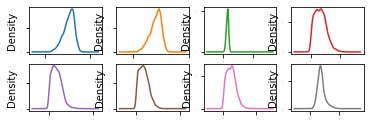

In [6]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
plt.show()

It is good to check the correlations between the attributes. From the output graph below, The red around
the diagonal suggests that attributes are correlated with each other. The yellow and green patches suggest some moderate correlation and the blue boxes show negative correlations. 

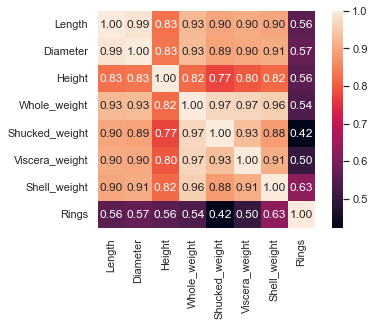

In [7]:
import seaborn as sns

correlation_map = data.corr(method='pearson')
sns.set(font_scale=1.0)
sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', 
            yticklabels=correlation_map.columns.values, 
            xticklabels=correlation_map.columns.values)

plt.show()

In [8]:
sex = {'M': 1, 'F': 2, 'I': 0}
# Use the dictionary to map the 'winner' column to the new column: election['color']
data['Sex'] = data.Sex.map(sex)

In [9]:
Y = data['Rings'].values
X = data.drop('Rings', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

## Baseline algorithm checking


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('AB', AdaBoostRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    start = time.time()
    cv_results = abs(cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error'))
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: RMSE %f (STD %f) (run time: %f)" % (name, sqrt(cv_results.mean()), cv_results.std(), end-start))

LR: RMSE 2.206841 (STD 0.666966) (run time: 0.022045)
LASSO: RMSE 3.180430 (STD 0.889317) (run time: 0.020140)
EN: RMSE 2.992304 (STD 0.795334) (run time: 0.012413)
KNN: RMSE 2.225850 (STD 0.567538) (run time: 0.036672)
CART: RMSE 3.043402 (STD 0.876658) (run time: 0.139124)
SVR: RMSE 2.250653 (STD 0.587349) (run time: 4.042637)
GBR: RMSE 2.136938 (STD 0.484993) (run time: 3.026530)
AB: RMSE 2.748213 (STD 0.695158) (run time: 1.447725)
RF: RMSE 2.169396 (STD 0.476952) (run time: 8.709532)
ET: RMSE 2.179258 (STD 0.467286) (run time: 4.654079)


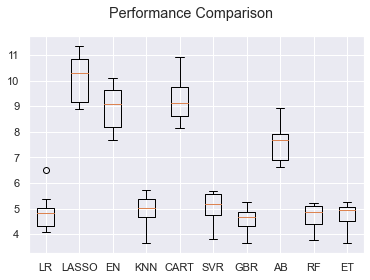

In [13]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the initial run, it looks like Gradient Boosting Method performed the best given the dataset. 

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_estimators=np.array([50,100,200,300,400, 500]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
start = time.time()
grid_result = grid.fit(X_train, Y_train)
end = time.time()

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (sqrt(abs(mean)), stdev, param))

print("Best: %f using %s (run time :%f)" % (sqrt(abs(grid_result.best_score_)), grid_result.best_params_, end-start))

2.157887 (0.496869) with: {'n_estimators': 50}
2.137637 (0.493237) with: {'n_estimators': 100}
2.151172 (0.545425) with: {'n_estimators': 200}
2.170447 (0.566922) with: {'n_estimators': 300}
2.188374 (0.624880) with: {'n_estimators': 400}
2.211073 (0.650115) with: {'n_estimators': 500}
Best: 2.137637 using {'n_estimators': 100} (run time :48.896706)


The best n_estimator configuration is 100 with the root mean square error closest to 0.

In [15]:
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(random_state=21, n_estimators=100)
model.fit(X_train, Y_train)

# transform the validation dataset
predictions = np.round(model.predict(X_test),0)
print (sqrt(mean_squared_error(Y_test, predictions)))

2.3120756432055387


In [16]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(10)

,Prediction,Test Data
0,11.0,12
1,11.0,12
2,9.0,8
3,8.0,9
4,8.0,10
5,10.0,9
6,11.0,10
7,12.0,10
8,9.0,10
9,9.0,8


## Feature Importance

Let's take a look what are the important features GBR used to build the model.

In [17]:
train = data.drop('Rings', axis = 1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
priority = pd.DataFrame({'Attribute Label': train.columns, 'Feature Importances': model.feature_importances_})
priority = priority.sort_values('Feature Importances', ascending=False)

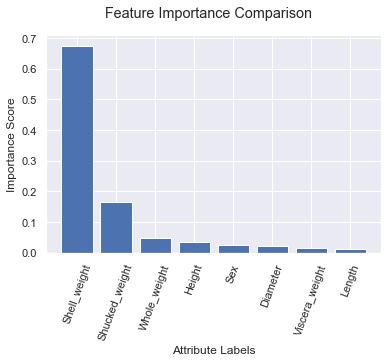

In [18]:
fig = plt.figure()
fig.suptitle('Feature Importance Comparison')
ax = fig.add_subplot(111)
plt.bar(range(len(priority)), priority['Feature Importances'])
ax.set_xticks(np.arange(len(priority['Attribute Label'])))
ax.set_xticklabels(priority['Attribute Label'], rotation=70)
plt.ylabel('Importance Score')
plt.xlabel('Attribute Labels')
plt.show()

## Using Neural Network to predict the age

In [22]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers

In [23]:
#Initialise Model
n_cols = X_train.shape[1] # Save the number of columns in predictors: n_cols
model = Sequential()
model.add(Dense(2*n_cols, activation='relu', input_shape=(n_cols,))) # Add the first layer
model.add(Dense(32, activation='relu')) #Add the second layer
model.add(Dense(1)) # Add the output layer, 1 neuron
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
#initiate the optimizer
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 
model.compile(loss='mean_squared_error', optimizer=sgd)

/Users/christopher_sia/opt/anaconda3/envs/python37/lib/python3.7/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
print("[INFO] evaluating on testing set...")
model.fit(X_train, Y_train, epochs=500, validation_split=0.2, verbose=True)

[INFO] evaluating on testing set...
Epoch 1/500
84/84 [==============================] - 0s 2ms/step - loss: 10.6685 - val_loss: 9.0901
Epoch 2/500
84/84 [==============================] - 0s 936us/step - loss: 6.3950 - val_loss: 5.9033
Epoch 3/500
84/84 [==============================] - 0s 949us/step - loss: 6.5654 - val_loss: 5.7575
Epoch 4/500
84/84 [==============================] - 0s 925us/step - loss: 6.0268 - val_loss: 5.5725
Epoch 5/500
84/84 [==============================] - 0s 943us/step - loss: 5.7639 - val_loss: 4.8265
Epoch 6/500
84/84 [==============================] - 0s 970us/step - loss: 6.6742 - val_loss: 6.1517
Epoch 7/500
84/84 [==============================] - 0s 1ms/step - loss: 6.4925 - val_loss: 6.6480
Epoch 8/500
84/84 [==============================] - 0s 2ms/step - loss: 6.3300 - val_loss: 5.4718
Epoch 9/500
84/84 [==============================] - 0s 1ms/step - loss: 6.0569 - val_loss: 5.1528
Epoch 10/500
84/84 [==============================] - 0s 1ms/s

84/84 [==============================] - 0s 1ms/step - loss: 4.4319 - val_loss: 6.2829
Epoch 82/500
84/84 [==============================] - 0s 916us/step - loss: 4.4638 - val_loss: 4.4020
Epoch 83/500
84/84 [==============================] - 0s 907us/step - loss: 4.3976 - val_loss: 4.9866
Epoch 84/500
84/84 [==============================] - 0s 919us/step - loss: 4.3881 - val_loss: 4.7747
Epoch 85/500
84/84 [==============================] - 0s 921us/step - loss: 4.3831 - val_loss: 4.4366
Epoch 86/500
84/84 [==============================] - 0s 1ms/step - loss: 4.3797 - val_loss: 4.3680
Epoch 87/500
84/84 [==============================] - 0s 958us/step - loss: 4.4088 - val_loss: 4.6103
Epoch 88/500
84/84 [==============================] - 0s 918us/step - loss: 4.4404 - val_loss: 4.7631
Epoch 89/500
84/84 [==============================] - 0s 927us/step - loss: 4.5373 - val_loss: 4.4527
Epoch 90/500
84/84 [==============================] - 0s 933us/step - loss: 4.2642 - val_loss: 4.31

In [ ]:
loss = sqrt(model.evaluate(X_test, Y_test, verbose=True))
print("[INFO] SQRT loss={:.3f}".format(loss))

In [ ]:
#predictions = np.round(model.predict(X_test), 0).tolist()
predictions = model.predict(X_test).tolist()
predictions = [item for items in predictions for item in items]
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.Prediction = compare.Prediction.astype(int)
compare.head(10)